In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [30]:
class PCA:
    
    def __init__(self):
        self.S=None
        self.V=None
        self.D=None
        self.newS=None
        
    def fit_dim(self,x,newDim):
        x=x-np.mean(x,axis=0)
        covMetrix=(1/x.shape[0])*x.T@x
        self.S,self.V,self.D=np.linalg.svd(covMetrix)
        self.newS=self.S[:,:newDim]
        return x@self.newS
    
    def fit_percent(self,x,dataPercent):
        x=x-np.mean(x,axis=0)
        covMetrix=(1/x.shape[0])*x.T@x
        self.S,self.V,self.D=np.linalg.svd(covMetrix)
        k=1
        for index in range(1,self.V.shape[0]):
            if np.sum(self.V[:index])/np.sum(self.V)>=dataPercent:
                k=index
                break
        self.newS=self.S[:,:k]
        return x@self.newS
    
    def get_S(self):
        return self.S
    
    def get_V(self):
        return self.V
    
    def get_D(self):
        return self.D
    
    def get_newS(self):
        return self.newS

In [31]:
x,y=datasets.make_blobs(n_samples=300,n_features=20,centers=10)

In [32]:
model=PCA()

In [33]:
result=model.fit_dim(x,2)

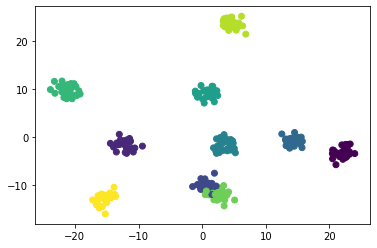

In [34]:
plt.scatter(result[:,0],result[:,1],c=y)

In [35]:
v=model.get_V()
v

array([157.47061086, 118.1116078 ,  83.10545536,  75.71285294,
        58.67343893,  40.40887404,  36.40392924,  27.74793928,
        16.50542272,   1.18991126,   1.16768972,   1.07279711,
         1.03779116,   0.95644878,   0.9135711 ,   0.88766234,
         0.85178619,   0.81045236,   0.74467293,   0.63955089])

In [38]:
result2=model.fit_percent(x,0.70)
result2

array([[-11.83926625,  -0.58994717, -11.13212528,   3.78430436,
         10.36351555],
       [ 20.46649934,  -3.43651078,  -9.96679559,  -4.3651612 ,
         -3.71097458],
       [-23.22062994,  11.62926028,  -1.64870707,  -8.45540396,
         -8.73966816],
       ...,
       [-14.99786508, -13.66703649,  -5.89616316,   0.52266564,
         -2.63775841],
       [ 22.96809208,  -1.55097942,  -9.78443443,  -4.13274207,
         -4.59041338],
       [-14.50851783, -11.67783907,  -7.36569011,   1.00525869,
         -3.41740391]])